# Exercise 1 

## The Discrete Cosine Transform (DCT)

The discrete cosine transform (DCT) helps separate the image into parts (or spectral sub-bands) of differing importance (with respect to the image's visual quality).  

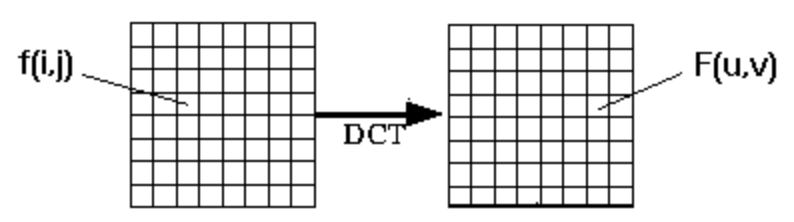

I fund the information of DCT in the mathwork of matlab:  
https://cn.mathworks.com/help/images/discrete-cosine-transform.html  

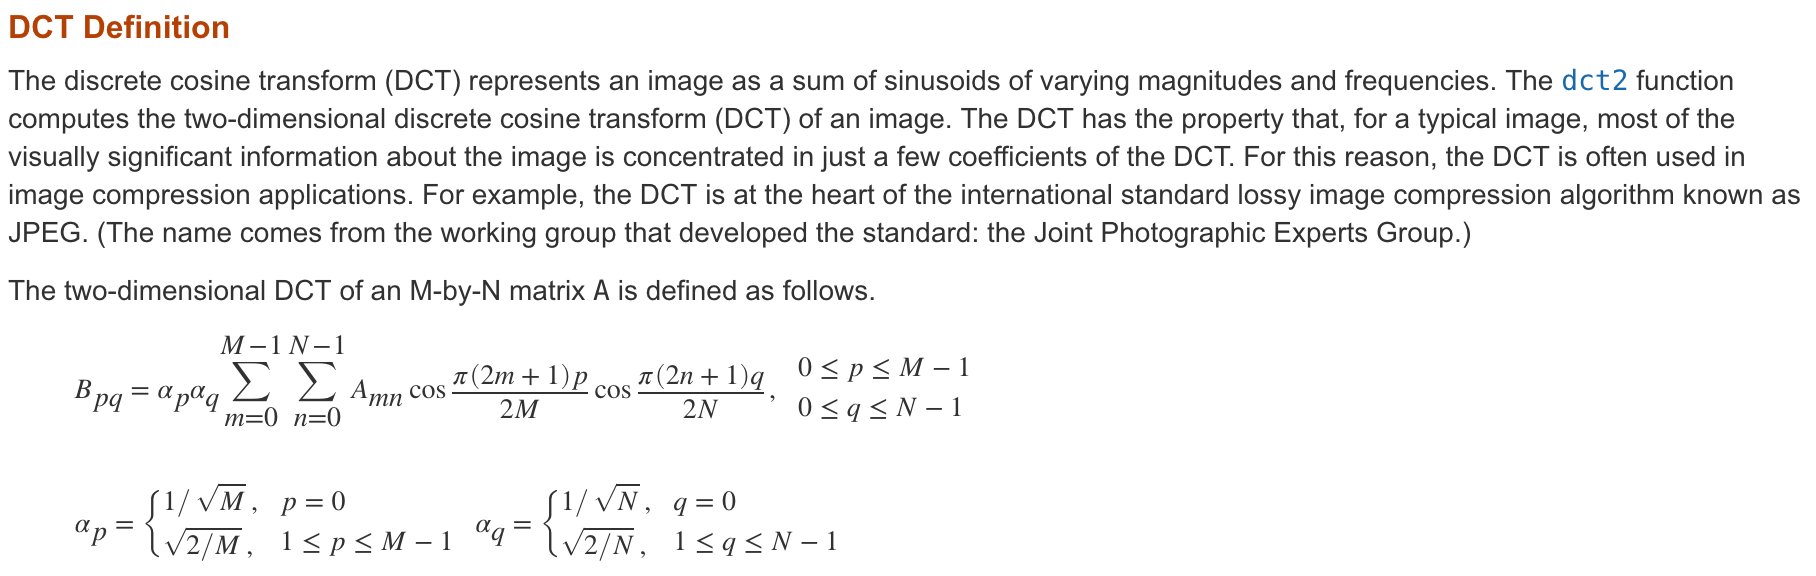

In this function, I wondered why the function using the sum.  
I ran TA's code and find the results should be a matrix of MxN pictures. And each picture is a matrix with M rows and N columns.  
So, I think there is not a sum in the function. $\sum\limits_{m=0}^{M-1}$ $\sum\limits_{n=0}^{N-1} A_{mn}$ means making a MxN matrix in each picture.

### Here is the code of using the DCT Definition

show the result together


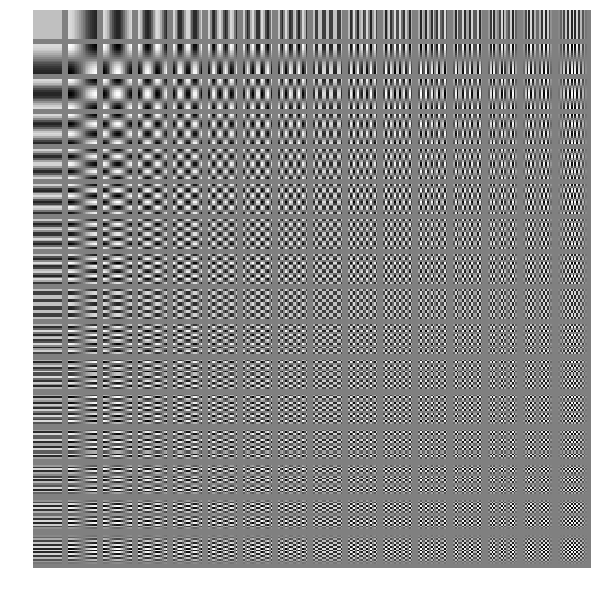

show the result separately


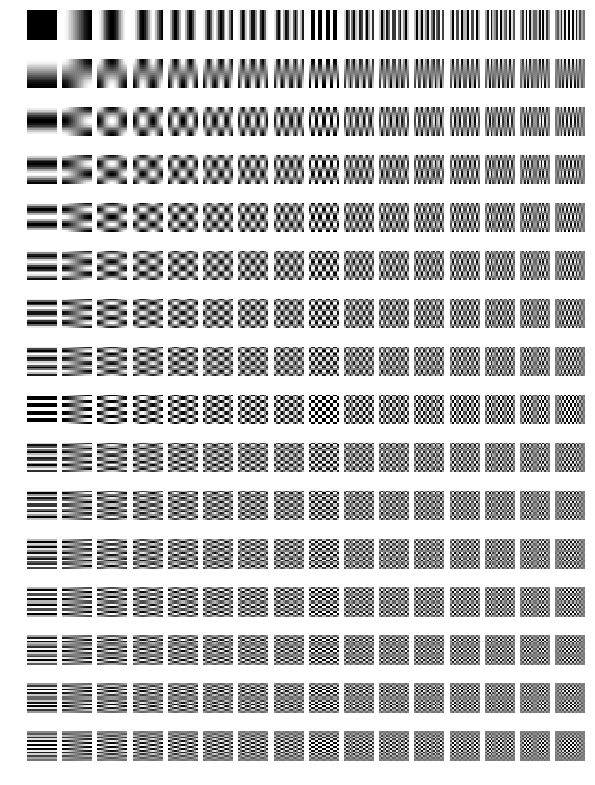

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import r_
from math import pi
import matplotlib.pylab as pylab
import matplotlib.cm as cm

%matplotlib inline
pylab.rcParams['figure.figsize'] = (10.0, 14.0)
M=16
N=16


#function of making the MxN matrix of each picture
def basic (u,v,M,N):
    cu = np.sqrt(2.0/M)
    cv = np.sqrt(2.0/N)
    B = np.zeros((M,N))
    if (u == 0):
        cu = 1/np.sqrt(M)
    if (v == 0):
        cv = 1/np.sqrt(M)
    for m in range (M):
        for n in range (N):
            B[m,n] = cu * cv * np.cos((pi*(2*m+1)*u)/(2.0*M)) * np.cos((pi*(2*n+1)*v)/(2.0*N))
    return B

# show the result together
print("show the result together")
line = 3
x = M * (N + line)
y = (M + line) * N 
DCT0 = np.zeros((x,y))
for u in range (M):
    for v in range (N):
        A = basic (u,v,M,N) 
        temp = np.pad(A,(0,line),mode = "constant")
        DCT0[u*(M+line):(u*(M+line)+(M+line)),v*(N+line):(v*(N+line)+(N+line))] = temp 
DCT = np.delete(DCT0,[x-line],axis=0)
DCT1 = np.delete(DCT,[y-line],axis=1)
plt.figure()
plt.imshow(DCT1,'gray')
plt.axis('off')
plt.show()

# show the result separately
print("show the result separately")
k=1
DCT2 = np.zeros((M*N, M*N))
for i in range (M):
    for j in range (N):
        B = basic (i,j,M,N)
        DCT2[i*M:(i*M+M),j*N:(j*N+N)] = B
        plt.subplot(M,N,k)
        plt.imshow(B,'gray')
        plt.axis('off')
        k=k+1

There is another way to calculate the basic function in mathwork:  
### Using the DCT Transform Matrix   

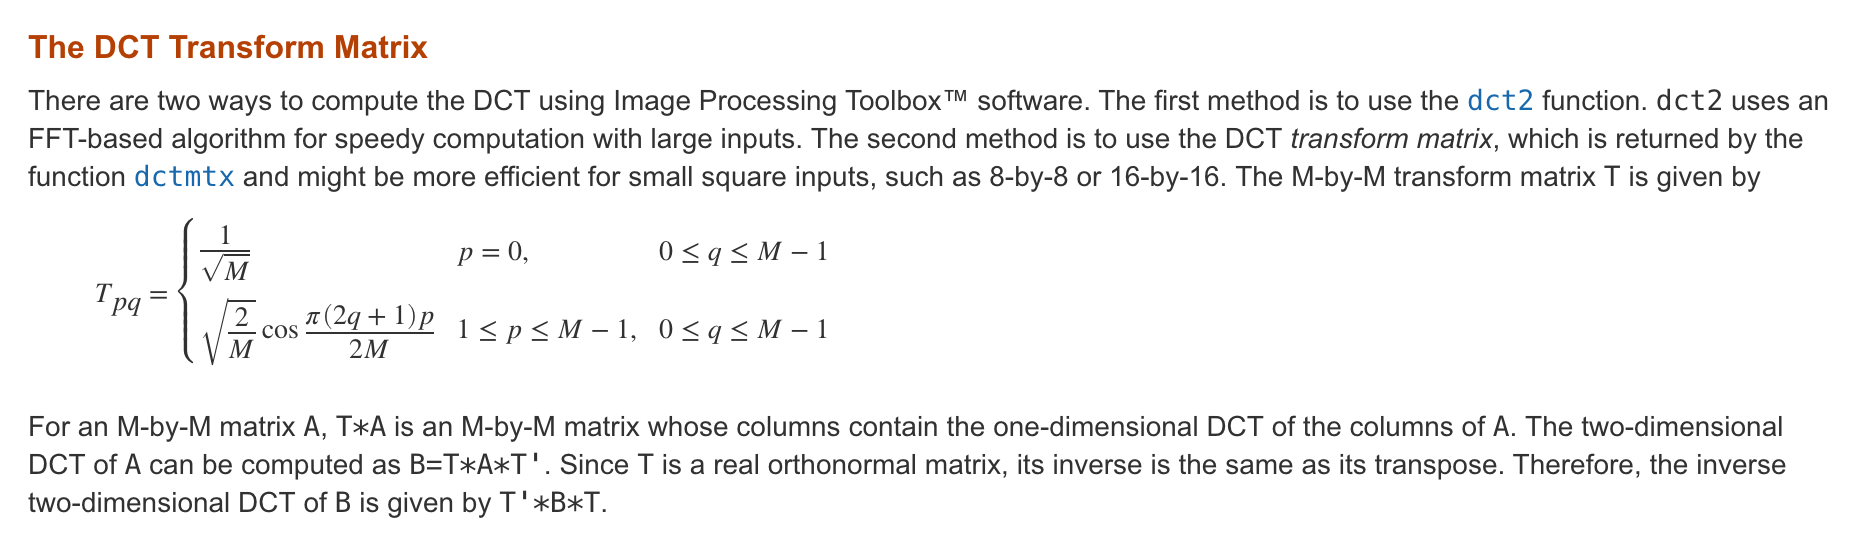  
  
In this method, the matrix must be MxM. According to the requirement of exercise, we can use this method.

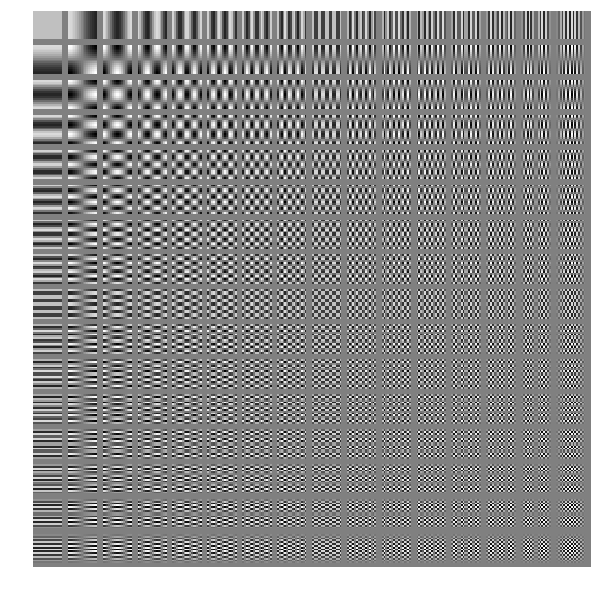

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import r_
from math import pi
import matplotlib.pylab as pylab
import matplotlib.cm as cm

%matplotlib inline
pylab.rcParams['figure.figsize'] = (10.0, 14.0)

M=16
A=np.zeros((M,M))
for u in range (M):
    for v in range (M):
        a = np.sqrt(2/M)
        if (u == 0):
            a = np.sqrt(1/M)
        A[u,v]= a * np.cos((pi * (2*v+1) * u)/(2.0*M))

C=A.flatten() 
C.shape=((M*M),1) 
D=np.transpose(C)
DCT0=C*D

line = 3
X = M * (M+line)
Y = M * (M+line) 
DCT3 = np.zeros((X,Y))
for a in range (M):
    for b in range (M):
        DCT3[a*(M+line):a*(M+line)+M,b*(M+line):b*(M+line)+M] = DCT0[a*M:a*M+M, b*M:b*M+M]
plt.figure()
plt.imshow(DCT,'gray')
plt.axis('off')
plt.show()